In [1]:
# required imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from pprint import pprint

#some columns contain comma-separated lists in string format, I turn them into list-objects here.
def c2l(commastring): 
    return commastring.split(', ')

df = pd.read_csv('anonymized_MythFic_metadata.csv', sep=';', converters={'character': c2l, 'category': c2l, 'fandom': c2l, 'relationship': c2l, 'additional tags': c2l,})

In [2]:
# indexing and alignment
df.index

RangeIndex(start=0, stop=5154, step=1)

In [3]:
# check
df.head

<bound method NDFrame.head of                                             title       author  \
0                     Flowers in the Golden Light     author_0   
1                                         Burning     author_1   
2                                  bambo nombre 5     author_2   
3                                          Anchor     author_3   
4     In Afterlife, Afterwards: Patroclus' Gambit     author_4   
...                                           ...          ...   
5149                          Sunrise in New York  author_2607   
5150                       Sunrise in Los Angeles  author_2607   
5151                            Sunrise in Mexico  author_2607   
5152                             Sunrise on Delos  author_2607   
5153                                 Gryphon Song  author_2608   

                 rating                            category  \
0     General Audiences                               [M/M]   
1                Mature                            

## Relationship Categories

{'F/M': 2045, 'Gen': 1367, 'M/M': 1301, 'F/F': 481, 'None': 413, 'Other': 278, 'Multi': 250}


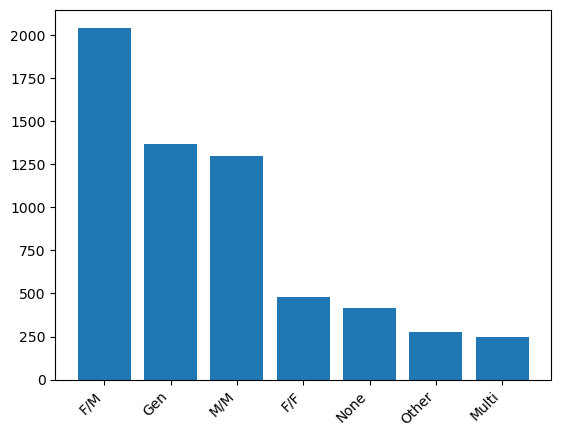

In [4]:
# fics are categorized according to the presence and gender of relationships.

def plot_df_by_gender(df):
    # identify all values used in the category-column
    category_list = df['category'].sum()

    # sanity check
    #print(category_list)

    # count frequency per value
    category_counter = Counter(category_list)
    

    #add 'None' label
    try:
        category_counter['None'] = category_counter.pop('')
    except KeyError:
        pass
    
    # sort by highest-frequency
    category_count_sorted = dict(category_counter.most_common())

    print(category_count_sorted)

    # plot results
    plt.bar(category_count_sorted.keys(), category_count_sorted.values())
    # plt.title('Frequency of Categories')
    plt.xticks(rotation=45, ha="right")

    # save as png
    # plt.savefig("category_sorted_AGrl.png")

plot_df_by_gender(df)

## Violence-Related Additional Tags

In [5]:
# identify all values used in the additional tags-column
additional_tag_list = df['additional tags'].sum()

# how many unique tags?
print(len(set(additional_tag_list)))

13936


In [6]:
# I created the violence-tagsets manually by looking at these tags and deciding which ones relate to violence.

# count frequency per value
additional_tag_counter = Counter(additional_tag_list)

# You can also see in these results that 616 stories have no additional tags, which is why I looked at 501 tags.
print(additional_tag_counter.most_common (501))

[('', 616), ('Angst', 335), ('Fluff', 304), ('Poetry', 251), ('References to Ancient Greek Religion & Lore', 238), ('Greek Mythology - Freeform', 200), ('Alternate Universe - Modern Setting', 194), ('Romance', 192), ('Mythology - Freeform', 153), ('Trojan War', 143), ('Alternate Universe', 141), ('Drabble', 136), ('Hurt/Comfort', 135), ('Alternate Universe - Canon Divergence', 133), ('Love', 130), ('Anal Sex', 120), ('Fluff and Angst', 117), ('Oral Sex', 115), ('Character Study', 105), ('Smut', 92), ('Grief/Mourning', 91), ('One Shot', 87), ('Angst with a Happy Ending', 86), ('Character Death', 84), ('Falling In Love', 82), ('Ancient Greece', 81), ('Canonical Character Death', 81), ('Fluff and Smut', 80), ('Established Relationship', 80), ('Gods', 80), ('Inspired by Hades and Persephone (Ancient Greek Religion & Lore)', 76), ('Death', 76), ('Implied/Referenced Rape/Non-con', 73), ('Emotional Hurt/Comfort', 70), ('Crossover', 69), ('Humor', 69), ('Alternate Universe - Ancient Greek Reli

In [7]:
# here, I manually define the sets of tags that make up the violence categories.

violence_tags = ['Canon-Typical Violence','Violence','Blood','Blood and Violence',
                 'Non-Graphic Violence','Minor Violence','Torture','Cannibalism', 
                 'Pain','Implied/Referenced Torture','Past Abuse']

noncon_tags = ['Implied/Referenced Rape/Non-con','Incest','Dubious Consent', 'Rape/Non-con Elements',
               'Sibling Incest','Past Rape/Non-con','Rape', 'Bestiality', 'Gang Rape', 'Mildly Dubious Consent',
               'Implied/Referenced Incest']

rough_tags = ['Rough Sex','Biting','Hair-pulling','Spanking',]

captivity_tags = ['Kidnapping', 'Abduction','Captivity', 'Imprisonment']

death_tags = ['Death','Implied/Referenced Character Death','Minor Character Death', 'Murder',
              'Temporary Character Death', 'Past Character Death']


## In order to perform analysis in SPSS, I need to transform this data

In [8]:
df_benelux = df['category'] + df['additional tags']
print(df_benelux)

0       [M/M, References to Ancient Greek Religion & L...
1       [F/M, Enemies to Lovers, Slave Trade, Alternat...
2                    [F/F, F/M, Gen, M/M, Multi, Other, ]
3       [F/F, F/M, M/M, abilities, abusing, Drug Use, ...
4       [M/M, Post-Canon, Afterlife, Established Relat...
                              ...                        
5149    [M/M, Greek Mythology - Freeform, Supernatural...
5150    [M/M, Greek Mythology - Freeform, Angst, Super...
5151    [M/M, Drama, Supernatural Elements, Greek Myth...
5152    [M/M, Greek Mythology - Freeform, Supernatural...
5153    [Gen, Mythical Beings & Creatures, Poetry, Str...
Length: 5154, dtype: object


In [9]:
def rowTagPresence(row, tagSets):
    rowdict = {}
    for name, tagSet in tagSets.items():
        if set(tagSet) & set(row):
            rowdict[name] = 1
        else:
            rowdict[name] = 0
    return rowdict

tally = []
            
for row in df_benelux:
    tally.append(rowTagPresence(row, {
        'F/M': ['F/M'],
        'M/M': ['M/M'],
        'F/F': ['F/F'],
        'Gen': ['Gen'],
        'Multi': ['Multi'],
        'Other': ['Other'],
        'physical': ['Canon-Typical Violence','Violence','Blood','Blood and Violence',
                 'Non-Graphic Violence','Minor Violence','Torture','Cannibalism', 
                 'Pain','Implied/Referenced Torture','Past Abuse'],
        'sexual': ['Implied/Referenced Rape/Non-con','Incest','Dubious Consent', 'Rape/Non-con Elements',
               'Sibling Incest','Past Rape/Non-con','Rape', 'Bestiality', 'Gang Rape', 'Mildly Dubious Consent',
               'Implied/Referenced Incest'],
        'rough': ['Rough Sex','Biting','Hair-pulling','Spanking',],
        'captivity': ['Kidnapping', 'Abduction','Captivity', 'Imprisonment'],
        'death': ['Death','Implied/Referenced Character Death','Minor Character Death', 'Murder',
              'Temporary Character Death', 'Past Character Death']
    }))

pprint(tally)

[{'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 1,
  'F/M': 1,
  'Gen': 1,
  'M/M': 1,
  'Multi': 1,
  'Other': 1,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 1,
  'F/M': 1,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 1,
  'F/M': 1,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other

  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 1,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 1,
  'rough': 0,
  'sexual': 1},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 1,
  'Multi': 1,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 1,
  'sexual': 0},
 {'F/F': 1,
  'F/M': 1,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 1,
  'captivity': 0,
  'death': 0

  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 1,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 1,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 1,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 1,
  'F/M': 0,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 1,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Mul

  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 0,
  'Multi': 1,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 1,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 1,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,

 {'F/F': 0,
  'F/M': 1,
  'Gen': 1,
  'M/M': 1,
  'Multi': 1,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 1,
  'rough': 1,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 1,
  'F/M': 0,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other

  'F/M': 0,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 1,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 1,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'cap

  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 1,
  'Multi': 1,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 0,
  'Gen': 1,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'rough': 0,
  'sexual': 0},
 {'F/F': 0,
  'F/M': 1,
  'Gen': 0,
  'M/M': 0,
  'Multi': 0,
  'Other': 0,
  'captivity': 0,
  'death': 0,
  'physical': 0,
  'roug

In [10]:
# now write this transformed data to a csv
keys = tally[0].keys()

with open('tally.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(tally)

In [11]:
# check
df = pd.DataFrame([tally])
print(df)

                                                0     \
0  {'F/M': 0, 'M/M': 1, 'F/F': 0, 'Gen': 0, 'Mult...   

                                                1     \
0  {'F/M': 1, 'M/M': 0, 'F/F': 0, 'Gen': 0, 'Mult...   

                                                2     \
0  {'F/M': 1, 'M/M': 1, 'F/F': 1, 'Gen': 1, 'Mult...   

                                                3     \
0  {'F/M': 1, 'M/M': 1, 'F/F': 1, 'Gen': 0, 'Mult...   

                                                4     \
0  {'F/M': 0, 'M/M': 1, 'F/F': 0, 'Gen': 0, 'Mult...   

                                                5     \
0  {'F/M': 0, 'M/M': 1, 'F/F': 0, 'Gen': 0, 'Mult...   

                                                6     \
0  {'F/M': 1, 'M/M': 0, 'F/F': 1, 'Gen': 1, 'Mult...   

                                                7     \
0  {'F/M': 0, 'M/M': 0, 'F/F': 0, 'Gen': 1, 'Mult...   

                                                8     \
0  {'F/M': 0, 'M/M': 1, 'F/F': 0, 'Gen':